<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center, text-weight: bold">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">3ra Entraga Proyecto</p></tp>
            <tp><p style="font-size:150%;text-align:center">Propuesta visualización para monitorias personalizadas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Objetivo <a class="anchor" id="inicio"></a>

En esta entrega del proyecto se propone una posible interfaz gráfica la cual pueda dar una visualización de las posibles soluciones a una personalización de la asignación de monitorias para cualquier institución educativa del mundo. Esto fue construido con conocimientos que se han adquirido a lo largo del curso "Lógica para las ciencias de la computación" de la Universidad del Rosario.

# Secciones

1. [Metodo de uso]()
2. [Ejemplificación de posibles soluciones]()


# Metodos de uso.

([Volver al inicio](#inicio))

En este caso, para que la solución gráfica tienga una solución apropiada, esta debe descargar todas sus dependencias como se muestra a continuación:

In [1]:
from interfaz_grafica import *
from horario import Horario

In [2]:
%matplotlib inline

Ahora, es necesario crear un objeto horario, par que este pueda acceder a todas las funciones contruidas, para dar solucion a nuestra problematica

In [3]:
h = Horario()

In [4]:
estudiantes = ['Moñas', 'Manuel', 'Sara']
profesores = ['Norma', 'Edgar', 'Edwin']
horarios = ['09:00 - 11:00', '11:00 - 13:00', '13:00 - 15:00']
materias = ['Programación', 'Algebra', 'Calculo']

In [6]:
A = inorder_to_tree(h.reglas[5])
print(A.ver(h.H))


(La materia Calculo se ve en el horario 13:00 - 15:00 del estudiante Sara. > La materia Calculo se ve en el horario 13:00 - 15:00 del profesor Edwin.)


Por ultimó, se ejecuta la función: 'visualizar_horario' para verificar el correcto funcionamiento para visualizar posbiles soluciones de problemas.

In [ ]:
I ={h.H.ravel([1, 1, 1, 1]):True, h.H.ravel([0, 1, 1, 1]):True,h.H.ravel([0, 2, 1, 1]):True,h.H.ravel([0, 2, 2, ]):True}
h.visualizar_est(I)

# Ejemplificación de posibles soluciones.

([Volver al inicio](#inicio))

se procede a mostrar una ejemplificación de poisbles visualizaciones a soluciones para nuestro problema.

Se tienen las posibles opciones de representacion:
Todas las materias disponibles.
Todas las materias no disponibles.
Solo una materia disponible.
Solo una materia no disponible.

In [ ]:
from Logica import *

## Visualización primera regla.

$$\bigwedge_{e \in \text{estudiante}} \bigwedge_{m \in \text{materia}} \bigwedge_{h \in \text{horario}} \Bigg(P(e, h, m) \rightarrow \bigvee_{p \in \text{profesores}} \bigvee_{h' \neq h}\Bigg(P(e, h', m) \land Q(p, h', m)\Bigg)\Bigg)$$

"Todo estudiante debe tener un profesor para la materia que demande"

In [ ]:
# Caso 1: Todas las materias disponibles
h.reglas[2]
R1 = tseitin(h.reglas[1])
s, dic = dpll(R1, {})

In [ ]:
if s == 'Satisfacible':
    h.visualizar_est(dic)
else:
    print('no es satisfacible')

## Visualización segunda regla. (PENDIENTE POR CORRECIÓN)

$$\bigwedge_{p \in profesores}\bigwedge_{e \in estudiantes}\bigwedge_{h \in horarios} \bigwedge_{m \in materias} \Bigg(\Bigg(P(e, h, m) \land Q(p, h, m)\Bigg) \rightarrow \bigwedge_{m' \neq m}\neg \Bigg(P(e, h, m') \land Q(p, h, m')\Bigg)\Bigg)$$

"Un profesor y estudiante, pueden estar en maximo 1 materia al mismo tiempo"

In [ ]:
# Caso 2: Todas las materias disponibles
h.reglas[1]
R2 = tseitin(h.reglas[1])
s, dic2 = dpll(R2, {})

In [ ]:
if s == 'Satisfacible':
    h.visualizar_est(dic2)
else:
    print('No es satisfacible')

## Visualización tercera regla.

$$\bigwedge_{p \in profesores} \bigwedge_{e \in estudiantes}\bigwedge_{h \in horarios} \bigwedge_{m \in materias} \Bigg(\Bigg( P(e, h, m) \land Q(p, h, m )\Bigg) \rightarrow \bigwedge_{p' \neq p}\neg \Bigg(P(e, h, m) \land Q(p', h, m)\Bigg) \Bigg)$$


"Toda monitoria puede tener máximo un profesor"

In [ ]:
# Caso 2: Todas las materias disponibles
h.reglas[2]
R3 = tseitin(h.reglas[2])
s, dic3 = dpll(R3, {h.H.ravel([0, 0, 1, 0]): False})

In [ ]:
if s == 'Satisfacible':
    h.visualizar_est(dic3)
else:
    print('No es satisfacible')

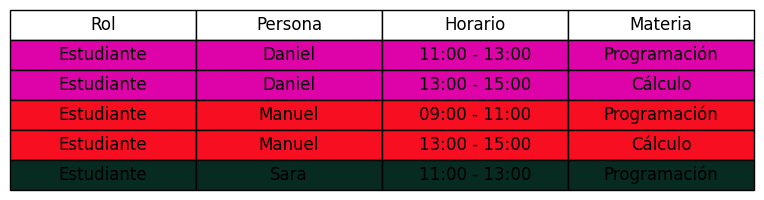

In [49]:
from interfaz_grafica import *
from horario import Horario
h = Horario()

# Lista B para almacenar los resultados
B = []

################ CONDICIONES DE LOS ESTUDIANTES
# Daniel: Programacion 9-11
for materias in [m for m in range(len(h.materias)) if m != 0]:
    for horarios in [h for h in range(len(h.horarios)) if h != 0]:
        B.append('-' + h.H.ravel([0, 0, horarios, materias]))

# Manuel: Algebra a la 11-1        
for materias in [m for m in range(len(h.materias)) if m != 1]:
    for horarios in [h for h in range(len(h.horarios)) if h != 1]:
        B.append('-' + h.H.ravel([0, 1, horarios, materias]))

# Sara: Calculo 1-3       
for materias in [m for m in range(len(h.materias)) if m != 2]:
    for horarios in [h for h in range(len(h.horarios)) if h != 2]:
        B.append('-' + h.H.ravel([0, 2, horarios, materias]))

################ CONDICIONES DE LOS PROFESORES
# Norma: Calculo 1 - 3
for materias in [m for m in range(len(h.materias)) if m != 2]:
    for horarios in [h for h in range(len(h.horarios)) if h != 2]:
        B.append('-' + h.H.ravel([1, 0, horarios, materias]))

# Edgar: Algebra 11-1       
for materias in [m for m in range(len(h.materias)) if m != 1]:
    for horarios in [h for h in range(len(h.horarios)) if h != 1]:
        B.append('-' + h.H.ravel([1, 1, horarios, materias]))

# Edwin: Programacion 9-11
for materias in [m for m in range(len(h.materias)) if m != 0]:
    for horarios in [h for h in range(len(h.horarios)) if h != 0]:
        B.append('-' + h.H.ravel([1, 2, horarios, materias]))


        
b_ytoriado = Ytoria(B)

A = Ytoria([h.reglas[0], h.reglas[1], h.reglas[2], h.reglas[4], h.reglas[5], h.reglas[6], b_ytoriado])
              
# A = h.reglas[3]
t = tseitin(A)

s, dic = dpll(t, {})

if s == 'Satisfacible':
    h.visualizar_est(dic)
else:
    print('bobo')